In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
oscar = pd.read_csv('oscar.csv')
oscar.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,year_film,year_ceremony,ceremony,category,name,film,winner,Number of wins,runtime
0,0,5,5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False,3,94
1,1,60,90,1929,1930,3,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,False,2,152
2,2,94,162,1931,1932,5,ACTRESS,Marie Dressler,Emma,False,1,120
3,3,128,236,1932,1933,6,DIRECTING,George Cukor,Little Women,False,3,115
4,4,146,266,1934,1935,7,ACTOR,Clark Gable,It Happened One Night,True,5,105


In [3]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.2    434 non-null    int64 
 1   Unnamed: 0.1    434 non-null    int64 
 2   Unnamed: 0      434 non-null    int64 
 3   year_film       434 non-null    int64 
 4   year_ceremony   434 non-null    int64 
 5   ceremony        434 non-null    int64 
 6   category        434 non-null    object
 7   name            434 non-null    object
 8   film            434 non-null    object
 9   winner          434 non-null    bool  
 10  Number of wins  434 non-null    int64 
 11  runtime         434 non-null    int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 37.8+ KB


In [4]:
sales = pd.read_csv('Highest Hollywood Grossing Movies.csv')
sales.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [5]:
sales['International Sales (in $)'].describe()

count    9.180000e+02
mean     2.301434e+08
std      2.176011e+08
min      2.600000e+02
25%      8.845620e+07
50%      1.638819e+08
75%      2.885577e+08
max      2.086739e+09
Name: International Sales (in $), dtype: float64

Winners : 2
False    312
True     122
Name: winner, dtype: int64


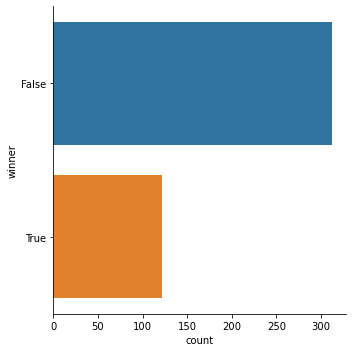

In [6]:
# Generations in the Dataset
print("Winners :", len(oscar["winner"].unique()))

# Pokemons in each Generation
print(oscar["winner"].value_counts())
sb.catplot(y = "winner", data = oscar, kind = "count")

In [7]:
sale = pd.DataFrame(sales[["International Sales (in $)"]])  # Response
win = pd.DataFrame(oscar["winner"])      # Predictor

In [8]:
# Train Set : 600 samples
win_train = pd.DataFrame(win[:600])
sale_train = pd.DataFrame(sale[:600])

# Test Set : 200 samples
win_test = pd.DataFrame(win[-200:])
sale_test = pd.DataFrame(sale[-200:])

# Check the sample sizes
print("Train Set :", sale_train.shape, win_train.shape)
print("Test Set  :", sale_test.shape, win_test.shape)

Train Set : (600, 1) (434, 1)
Test Set  : (200, 1) (200, 1)


In [9]:
type(sale_train["International Sales (in $)"])

pandas.core.series.Series

In [10]:
sale_train["International Sales (in $)"].value_counts()

119600000     2
1132859475    1
112589342     1
467088155     1
150300000     1
             ..
502098977     1
166809514     1
268509687     1
417280431     1
85339696      1
Name: International Sales (in $), Length: 599, dtype: int64

In [11]:
win_train.describe()

,winner
count,434
unique,2
top,False
freq,312


<AxesSubplot:xlabel='International Sales (in $)', ylabel='Count'>

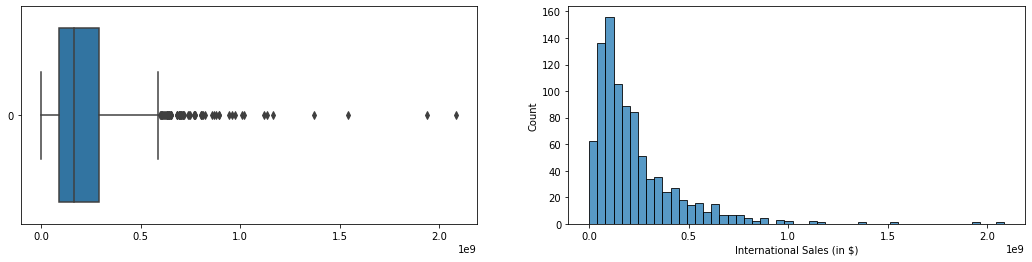

In [12]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = sale['International Sales (in $)'], orient = "h", ax = axes[0])
sb.histplot(data = sale['International Sales (in $)'], ax = axes[1])

In [13]:
for d in range(0, len(oscar)):
    if oscar['winner'].loc[d] == True:
        oscar['winner'].loc[d] = 'Win'
    else:
        oscar['winner'].loc[d] = 'No Win'
oscar

C:\Users\verno\AppData\Local\Temp\ipykernel_9152\2013933885.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar['winner'].loc[d] = 'No Win'


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,year_film,year_ceremony,ceremony,category,name,film,winner,Number of wins,runtime
0,0,5,5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,No Win,3,94
1,1,60,90,1929,1930,3,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,No Win,2,152
2,2,94,162,1931,1932,5,ACTRESS,Marie Dressler,Emma,No Win,1,120
3,3,128,236,1932,1933,6,DIRECTING,George Cukor,Little Women,No Win,3,115
4,4,146,266,1934,1935,7,ACTOR,Clark Gable,It Happened One Night,Win,5,105
...,...,...,...,...,...,...,...,...,...,...,...,...
429,429,4798,10289,2019,2020,92,ANIMATED FEATURE FILM,"Sergio Pablos, Jinko Gotoh and Marisa Román",Klaus,No Win,0,96
430,430,4802,10295,2019,2020,92,CINEMATOGRAPHY,Roger Deakins,1917,Win,3,119
431,431,4803,10306,2019,2020,92,DIRECTING,Bong Joon Ho,Parasite,Win,4,132
432,432,4814,10317,2019,2020,92,FILM EDITING,Michael McCusker and Andrew Buckland,Ford v Ferrari,Win,2,152


In [1]:
title = []
rating = []
win = []
k = 0
for os in range(0, len(oscar)):
    #print(oscar['film'][os])
    for sl in range(0, len(sales)):
        if oscar['film'][os]==dataset['Title'][sl]:
            #print("match")
            k+=1
            title.append(dataset['Title'][sl])
            sale.append(dataset['Rating'][sl])
            win.append(oscar['winner'][os])
dict = {'Title':title, 'Rating':sale, 'winner':win}
ndf = pd.DataFrame(dict)
ndf

NameError: name 'oscar' is not defined

In [18]:
df = pd.concat(
    map(pd.read_csv, ['oscar.csv', 'Highest Hollywood Grossing Movies.csv']), ignore_index=True)
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,year_film,year_ceremony,ceremony,category,name,film,winner,...,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0.0,5.0,5,1927.0,1928.0,1.0,ART DIRECTION,Rochus Gliese,Sunrise,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,60.0,90,1929.0,1930.0,3.0,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,94.0,162,1931.0,1932.0,5.0,ACTRESS,Marie Dressler,Emma,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,128.0,236,1932.0,1933.0,6.0,DIRECTING,George Cukor,Little Women,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,146.0,266,1934.0,1935.0,7.0,ACTOR,Clark Gable,It Happened One Night,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,NaN,NaN,913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787.0,36813370.0,117815157.0,"['Drama', 'Romance']",2 hr 3 min,PG-13
1348,NaN,NaN,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232.0,22056304.0,102992536.0,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
1349,NaN,NaN,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010.0,124020006.0,204594016.0,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
1350,NaN,NaN,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655.0,26792250.0,107363905.0,"['Crime', 'Horror']",1 hr 38 min,R


In [25]:
'''num = 0
for f in range(0, len(df)):
    if ((df['winner'][f]!=np.nan) and (df['International Sales (in $)'][f]!=np.nan)):
        num+=1
        print(df['film'][f])
print(num)'''

Sunrise
All Quiet on the Western Front
Emma
Little Women
It Happened One Night
The Thin Man
Men in Black
Snow White and the Seven Dwarfs
The Adventures of Robin Hood
Gone with the Wind
Mr. Smith Goes to Washington
Stagecoach
The Wizard of Oz
The Hunchback of Notre Dame
The Great Dictator
The Grapes of Wrath
Rebecca
The Philadelphia Story
Citizen Kane
The Maltese Falcon
The Gold Rush
To Be or Not to Be
Casablanca
The Ox-Bow Incident
Shadow of a Doubt
Laura
Double Indemnity
Brazil
The Lost Weekend
The Best Years of Our Lives
Henry V
It's a Wonderful Life
Notorious
Brief Encounter
Children of Paradise
Great Expectations
Hamlet
The Treasure of the Sierra Madre
The Red Shoes
Red River
White Heat
Cyrano de Bergerac
Sunset Blvd.
Harvey
The Third Man
The African Queen
A Streetcar Named Desire
Strangers on a Train
High Noon
The Quiet Man
Singin' in the Rain
Rashomon
From Here to Eternity
Stalag 17
Roman Holiday
Titanic
The Caine Mutiny
On the Waterfront
Sabrina
Rear Window
The Magnificent Seven

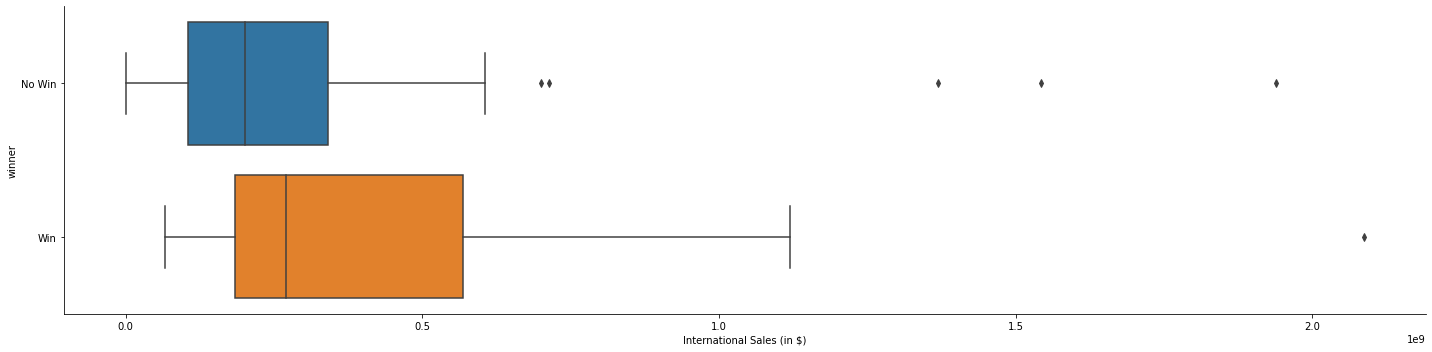

In [34]:
sb.catplot(x='International Sales (in $)',y='winner',data=ndf,kind='box', orient="h",aspect=4)

In [16]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,year_film,year_ceremony,ceremony,category,name,film,winner,...,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0.0,5.0,5,1927.0,1928.0,1.0,ART DIRECTION,Rochus Gliese,Sunrise,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,60.0,90,1929.0,1930.0,3.0,CINEMATOGRAPHY,(Arthur Edeson),All Quiet on the Western Front,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,94.0,162,1931.0,1932.0,5.0,ACTRESS,Marie Dressler,Emma,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,128.0,236,1932.0,1933.0,6.0,DIRECTING,George Cukor,Little Women,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,146.0,266,1934.0,1935.0,7.0,ACTOR,Clark Gable,It Happened One Night,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,NaN,NaN,913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787.0,36813370.0,117815157.0,"['Drama', 'Romance']",2 hr 3 min,PG-13
1348,NaN,NaN,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Jimmy Neutron: Boy Genius (2001),An eight-year-old boy genius and his friends m...,Paramount Pictures,"December 21, 2001",80936232.0,22056304.0,102992536.0,"['Action', 'Adventure', 'Animation', 'Comedy',...",1 hr 22 min,NaN
1349,NaN,NaN,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010.0,124020006.0,204594016.0,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
1350,NaN,NaN,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655.0,26792250.0,107363905.0,"['Crime', 'Horror']",1 hr 38 min,R
